# Import Libraries

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Loading & examining data


In [4]:
# Load the customer_data
customer_data = pd.read_csv('/Users/kiranbele/Documents/Projects/Customer-Analytics-A-B-Testing/ab-testing-project/datasets/user_demographics_v1.csv')

# Load the app_purchases
app_purchases = pd.read_csv('/Users/kiranbele/Documents/Projects/Customer-Analytics-A-B-Testing/ab-testing-project/datasets/purchase_data_v1.csv')

# Load the daily_revenue
daily_revenue = pd.read_csv('/Users/kiranbele/Documents/Projects/Customer-Analytics-A-B-Testing/ab-testing-project/datasets/daily_revenue.csv')

# Load the user_demographic
user_demographics = pd.read_csv('/Users/kiranbele/Documents/Projects/Customer-Analytics-A-B-Testing/ab-testing-project/datasets/user_demographics_paywall.csv')

# Print the columns of customer data
print(customer_data.columns)

# Print the columns of app_purchases
print(app_purchases.columns)

# Print the columns of daily_revenue
print(daily_revenue.columns)

# Print the columns of user_demographic
print(user_demographics.columns)

Index(['uid', 'reg_date', 'device', 'gender', 'country', 'age'], dtype='object')
Index(['date', 'uid', 'sku', 'price'], dtype='object')
Index(['index', 'gender', 'device', 'revenue', 'date', 'country'], dtype='object')
Index(['uid', 'reg_date', 'device', 'gender', 'country', 'age'], dtype='object')


# Merging on different sets of fields

In [5]:
# Merge on the 'uid' field
Purchase_data = app_purchases.merge(customer_data, on=['uid'], how='inner')

# Examine the results 
print(Purchase_data.head())
print(len(Purchase_data))

         date       uid            sku  price              reg_date device  \
0  2017-07-10  41195147  sku_three_499    499  2017-06-26T00:00:00Z    and   
1  2017-07-15  41195147  sku_three_499    499  2017-06-26T00:00:00Z    and   
2  2017-11-12  41195147   sku_four_599    599  2017-06-26T00:00:00Z    and   
3  2017-09-26  91591874    sku_two_299    299  2017-01-05T00:00:00Z    and   
4  2017-12-01  91591874   sku_four_599    599  2017-01-05T00:00:00Z    and   

  gender country  age  
0      M     BRA   17  
1      M     BRA   17  
2      M     BRA   17  
3      M     TUR   17  
4      M     TUR   17  
9006


# Aggregations

In [6]:

# Calculate the mean purchase price 
purchase_price_mean = Purchase_data.price.agg('mean')

# Examine the output 
print(purchase_price_mean)

406.77259604707973


In [7]:
# Calculate the mean and median purchase price 
purchase_price_summary = Purchase_data.price.agg(['mean', 'median'])

# Examine the output 
print(purchase_price_summary)

mean      406.772596
median    299.000000
Name: price, dtype: float64


In [8]:
# Calculate the mean and median of price and age
purchase_summary = Purchase_data.agg({'price': ['mean', 'median'], 'age': ['mean', 'median']})

# Examine the output 
print(purchase_summary)

             price        age
mean    406.772596  23.922274
median  299.000000  21.000000


# Grouping & aggregating

In [9]:
# Group the data 
grouped_purchase_data = Purchase_data.groupby(by=['device', 'gender'])

# Aggregate the data
purchase_summary = grouped_purchase_data.agg({'price': ['mean', 'median', 'std']})

# Examine the results
print(purchase_summary)

                    price                   
                     mean median         std
device gender                               
and    F       400.747504  299.0  179.984378
       M       416.237308  499.0  195.001520
iOS    F       404.435330  299.0  181.524952
       M       405.272401  299.0  196.843197


# Calculating KPIs

calculating the average amount paid per purchase within a user's first 28 days using the purchase_data DataFrame from before.

This KPI can provide a sense of the popularity of different in-app purchase price points to users within their first month.

In [10]:
Purchase_data['reg_date'] = pd.to_datetime(Purchase_data['reg_date'], errors='coerce')

# Define the current date
current_date = datetime.now()  # or use a specific date, e.g., datetime(2023, 10, 1)

# To Compute max_purchase_date
max_purchase_date = current_date - timedelta(days=28)

# Make 'reg_date' timezone-naive
Purchase_data['reg_date'] = Purchase_data['reg_date'].dt.tz_localize(None)

# Filter to only include users who registered before max_purchase_date
purchase_data_filt = Purchase_data[Purchase_data['reg_date'] < max_purchase_date]

# Filter to contain only purchases within the first 28 days of registration
purchase_data_filt = purchase_data_filt[(purchase_data_filt.date <= purchase_data_filt.reg_date + timedelta(days=28))]

# Output the mean price paid per purchase
print(purchase_data_filt.price.mean())

415.7741935483871


## Average purchase price by cohort

In [11]:
# Setting the max registration date to be one month before today
max_reg_date = current_date - timedelta(days=28)

# Finding the month 1 values
month1 = np.where((Purchase_data.reg_date < max_reg_date) & (Purchase_data.date < Purchase_data.reg_date + timedelta(days=28)), Purchase_data.price, np.nan)
                 
# Updating the value in the DataFrame
Purchase_data['month1'] = month1

# Grouping the data by gender and device 
purchase_data_upd = Purchase_data.groupby(by=['gender', 'device'], as_index=False)

# Aggregating the month1 and price data 
purchase_summary = purchase_data_upd.agg({'month1': ['mean', 'median'],'price': ['mean', 'median']})

# Examine the results 
print(purchase_summary)

  gender device      month1              price       
                       mean median        mean median
0      F    and  390.758242  299.0  400.747504  299.0
1      F    iOS  429.434783  499.0  404.435330  299.0
2      M    and  417.285714  499.0  416.237308  499.0
3      M    iOS  434.398230  499.0  405.272401  299.0


This value seems relatively stable over the past 28 days.

# Working with Time Series Data Using Pandas

# Parsing dates

In [12]:
# Paring of variety of date formats 
date_data_one = "Saturday, January 27, 2017"  
date_data_one = pd.to_datetime(date_data_one, format="%A, %B %d, %Y")  
print(date_data_one)
date_data_two = "2017-08-01"
date_data_two = pd.to_datetime(date_data_two, format="%Y-%m-%d")
print(date_data_two)
date_data_three = "08/17/1978"
date_data_three = pd.to_datetime(date_data_three, format="%m/%d/%Y")
print(date_data_three)
date_data_four = "2016 March 01 01:56"
date_data_four = pd.to_datetime(date_data_four, format="%Y %B %d %H:%M")
print(date_data_four)

2017-01-27 00:00:00
2017-08-01 00:00:00
1978-08-17 00:00:00
2016-03-01 01:56:00


# Plotting time series data

In [13]:
# Ensuring 'date' and 'reg_date' are datetime objects
Purchase_data['date'] = pd.to_datetime(Purchase_data['date'], errors='coerce')
Purchase_data['reg_date'] = pd.to_datetime(Purchase_data['reg_date'], errors='coerce')

# Adding a column to indicate first-week purchases (1 if within 7 days, else 0)
Purchase_data['first_week_purchases'] = (
    (Purchase_data['date'] >= Purchase_data['reg_date']) & 
    (Purchase_data['date'] <= Purchase_data['reg_date'] + pd.Timedelta(days=7))
).astype(int)

# Verifying the column creation
print(Purchase_data.head())



        date       uid            sku  price   reg_date device gender country  \
0 2017-07-10  41195147  sku_three_499    499 2017-06-26    and      M     BRA   
1 2017-07-15  41195147  sku_three_499    499 2017-06-26    and      M     BRA   
2 2017-11-12  41195147   sku_four_599    599 2017-06-26    and      M     BRA   
3 2017-09-26  91591874    sku_two_299    299 2017-01-05    and      M     TUR   
4 2017-12-01  91591874   sku_four_599    599 2017-01-05    and      M     TUR   

   age  month1  first_week_purchases  
0   17   499.0                     0  
1   17   499.0                     0  
2   17     NaN                     0  
3   17     NaN                     0  
4   17     NaN                     0  


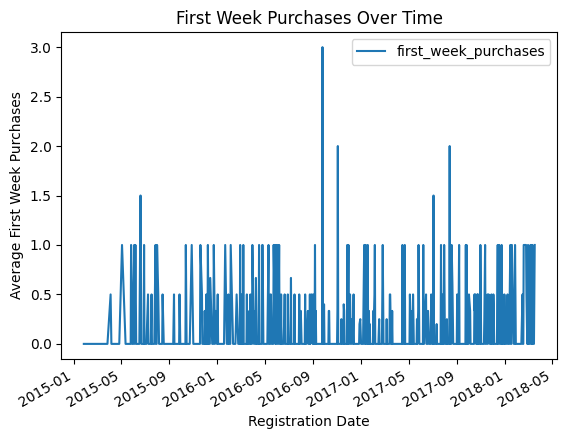

In [103]:
# Group the data and aggregate first_week_purchases
user_purchases = Purchase_data.groupby(by=['reg_date', 'uid']).agg({'first_week_purchases': ['sum']})

# Reset the indexes
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

# Find the average number of purchases per day by first-week users
user_purchases = user_purchases.groupby(by=['reg_date']).agg({'first_week_purchases': ['mean']})
user_purchases.columns = user_purchases.columns.droplevel(level=1)
user_purchases.reset_index(inplace=True)

# Plot the results 
user_purchases.plot(x='reg_date', y='first_week_purchases', kind='line', title='First Week Purchases Over Time')
plt.xlabel("Registration Date")
plt.ylabel("Average First Week Purchases")
plt.show()


There does indeed seem to be a substantial increase in the average number of first week purchases!

# Pivoting data

In [14]:
#To group and aggregate by the 'country' column:

# Group by 'country' and aggregate the mean of 'first_week_purchases'
user_purchases_country = Purchase_data.groupby('country').agg({
    'first_week_purchases': 'mean'
}).reset_index()

user_purchases_country['reg_date'] = Purchase_data['reg_date'].dt.to_period('D')

# Print the result to verify
print("User purchases aggregated by country:")
print(user_purchases_country.head())

User purchases aggregated by country:
  country  first_week_purchases    reg_date
0     BRA              0.028953  2017-06-26
1     CAN              0.017544  2017-06-26
2     DEU              0.018579  2017-06-26
3     FRA              0.020221  2017-01-05
4     TUR              0.033582  2017-01-05


In [15]:
#To group and aggregate by the 'device' column:

# Group by 'reg_date' and 'device' and aggregate the mean of 'first_week_purchases'
user_purchases_device = Purchase_data.groupby(['reg_date', 'device']).agg({
    'first_week_purchases': 'mean'
}).reset_index()

# Pivot the data for easier visualization
device_pivot = pd.pivot_table(
    user_purchases_device,
    values='first_week_purchases',
    columns='device',
    index='reg_date'
)

# Print the pivoted table to verify the output
print("User purchases aggregated by device:")
print(device_pivot.head())

User purchases aggregated by device:
device      and  iOS
reg_date            
2015-01-27  NaN  0.0
2015-02-01  0.0  NaN
2015-02-09  0.0  NaN
2015-02-10  NaN  0.0
2015-03-01  NaN  0.0


In [16]:
# Pivot the data 
country_pivot = pd.pivot_table(user_purchases_country, values=['first_week_purchases'], columns=['country'], index=['reg_date'])
print(country_pivot.head())

           first_week_purchases                                          \
country                     BRA       CAN       DEU       FRA       TUR   
reg_date                                                                  
2016-10-07                  NaN       NaN       NaN       NaN       NaN   
2017-01-05                  NaN       NaN       NaN  0.020221  0.033582   
2017-06-26             0.028953  0.017544  0.018579       NaN       NaN   

                     
country         USA  
reg_date             
2016-10-07  0.02137  
2017-01-05      NaN  
2017-06-26      NaN  


# Seasonality and moving averages

<Figure size 1400x800 with 0 Axes>

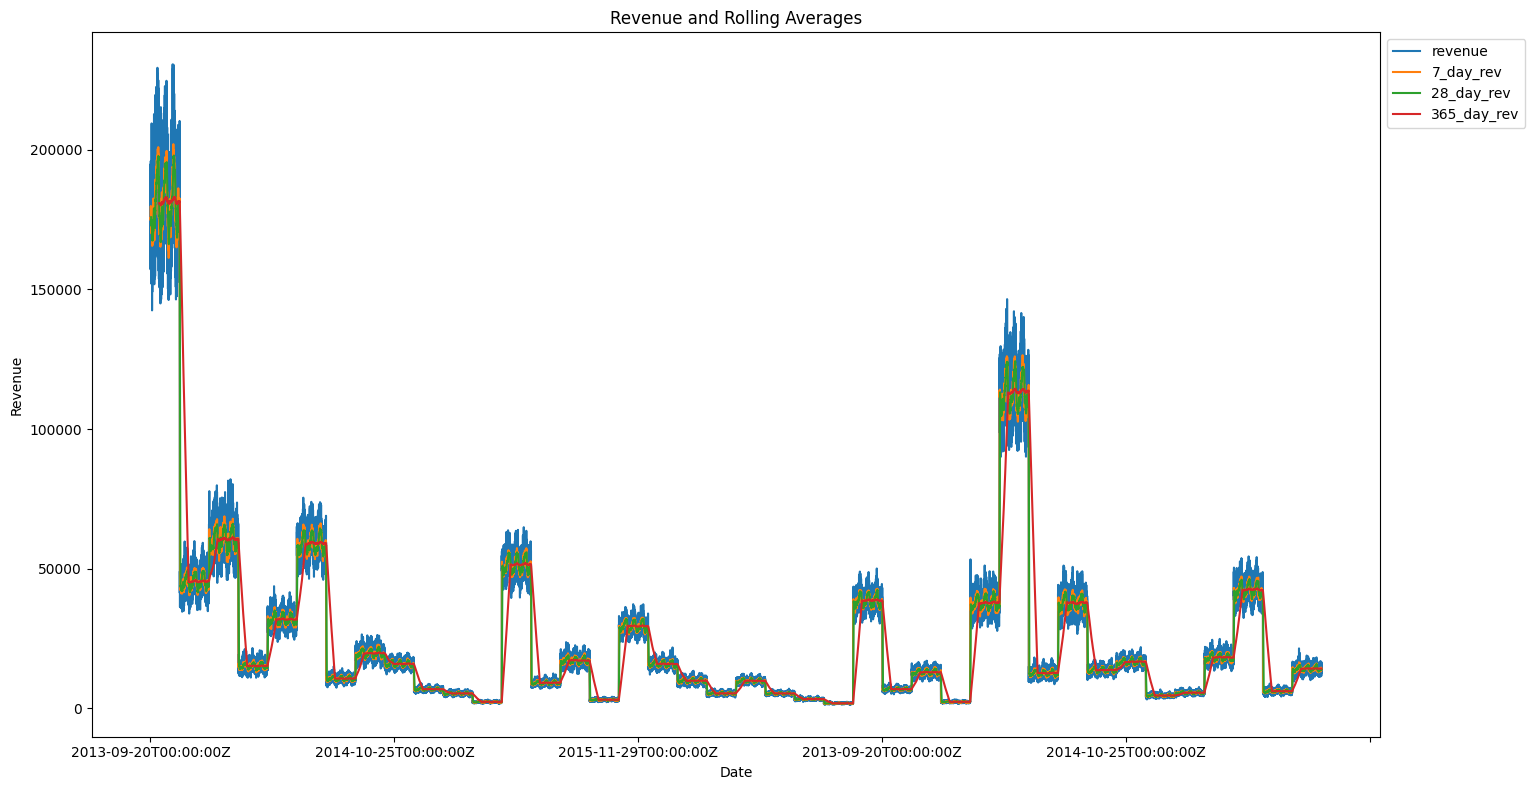

In [17]:
# Compute rolling averages
daily_revenue['7_day_rev'] = daily_revenue.revenue.rolling(window=7, center=False).mean()
daily_revenue['28_day_rev'] = daily_revenue.revenue.rolling(window=28, center=False).mean()
daily_revenue['365_day_rev'] = daily_revenue.revenue.rolling(window=365, center=False).mean()

# Plot 
plt.figure(figsize=(14, 8))  
daily_revenue.plot(
    x='date', 
    y=['revenue', '7_day_rev', '28_day_rev', '365_day_rev'],
    title="Revenue and Rolling Averages",
    figsize=(14, 8),
    xlabel="Date",
    ylabel="Revenue",
    
)    
plt.tight_layout() 
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))   
plt.show()

The graph highlights clear seasonal trends with regular peaks and troughs, suggesting periodic customer behavior, possibly tied to events or promotions. The 7-day rolling average captures short-term fluctuations, while the 28-day and 365-day averages reveal medium- and long-term growth trends. Revenue shows significant volatility day-to-day, with occasional spikes likely due to promotions or events. Toward the end, there’s a visible stabilization of fluctuations, indicating consistent patterns. 

# Exponential rolling average & over/under smoothing

<Figure size 1400x800 with 0 Axes>

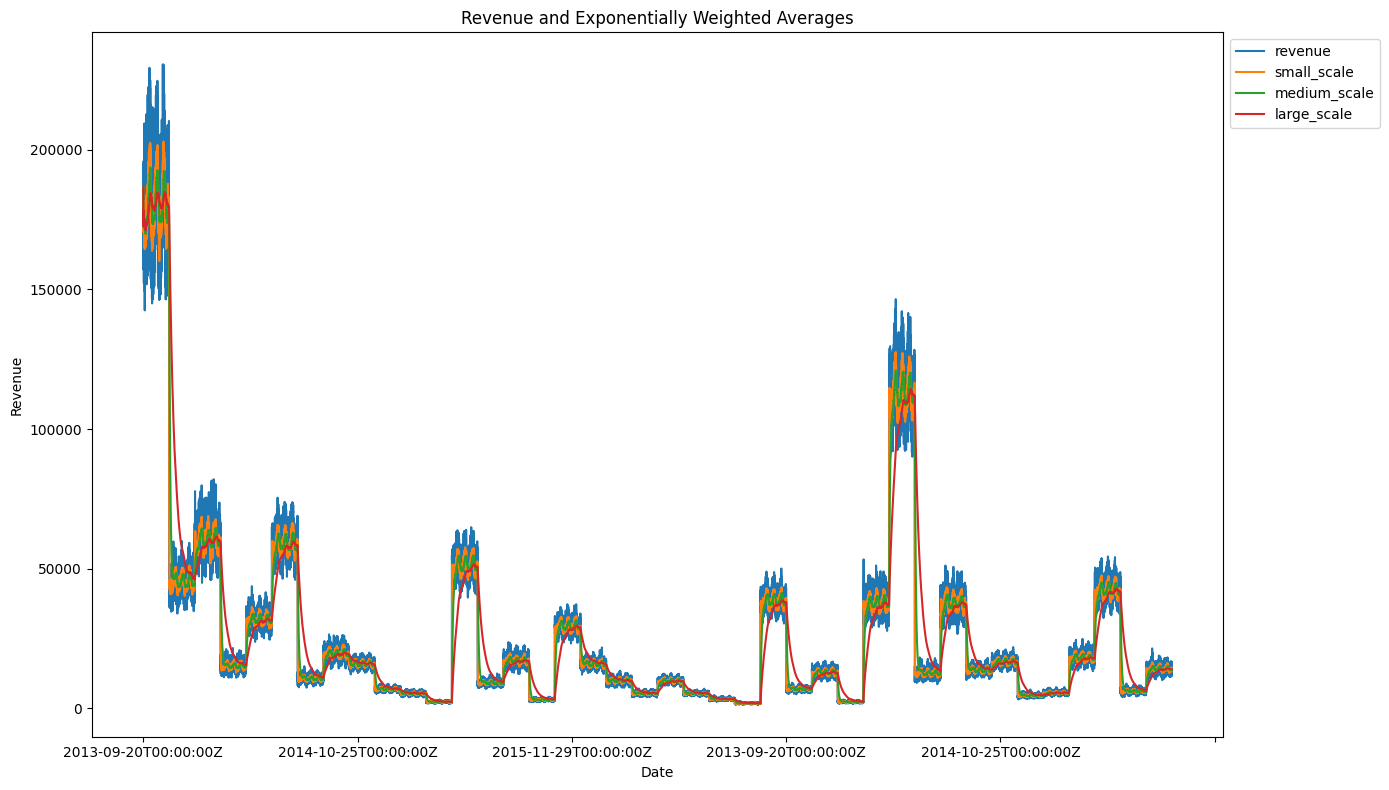

In [18]:
# Ensure columns are created
daily_revenue['small_scale'] = daily_revenue['revenue'].ewm(span=10).mean()
daily_revenue['medium_scale'] = daily_revenue['revenue'].ewm(span=100).mean()
daily_revenue['large_scale'] = daily_revenue['revenue'].ewm(span=500).mean()

# Plot the data
plt.figure(figsize=(14, 8))
daily_revenue.plot(
    x='date', 
    y=['revenue', 'small_scale', 'medium_scale', 'large_scale'],
    figsize=(14, 8),
    title="Revenue and Exponentially Weighted Averages"
)

# Adding labels and legend
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Revenue and Exponentially Weighted Averages")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  
plt.tight_layout()

# Display the plot
plt.show()

the medium window strikes the right balance. Revenue seems to be growing in this product so it must not be the cause of the overall flat revenue trend!

# Visualizing user spending

In [19]:
# Convert 'date' column to datetime if not already
daily_revenue['date'] = pd.to_datetime(daily_revenue['date'])

# Extract 'month' from the 'date' column
daily_revenue['month'] = daily_revenue['date'].dt.to_period('M')

# Group by 'month', 'device', and 'gender' and calculate the total revenue
grouped_revenue = daily_revenue.groupby(['month', 'device', 'gender'])['revenue'].sum().reset_index()

# Print the grouped data to verify
print(grouped_revenue.head())

     month   device  gender    revenue
0  2013-09  android  female  1144057.0
1  2013-09  android    male  3447967.0
2  2013-09      ios  female  1543801.0
3  2013-09      ios    male  4631978.0
4  2013-10  android  female  3233420.0


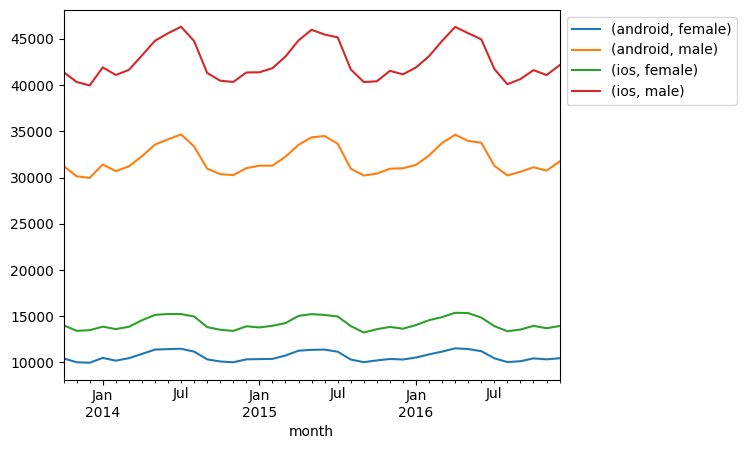

In [171]:
# Pivot user_revenue
pivoted_data = pd.pivot_table(daily_revenue, values='revenue', columns=['device', 'gender'], index='month')
pivoted_data = pivoted_data[1:(len(pivoted_data) -1 )]

# Create and show the plot
figsize=(14, 8)
pivoted_data.plot()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) 
plt.show()

Aggregate revenue is fairly stable, so the changes are most likely not hurting revenue.

# Initial A/B Test Design

## Experimental units: Revenue per user day

In [21]:
# Round our timestamp to 'day'
Purchase_data['date'] = Purchase_data['date'].dt.floor('d')

# Replace the NaN price values with 0
Purchase_data['price'] = np.where(Purchase_data['price'].isnull(), 0, Purchase_data['price'])

# Aggregate the data by 'uid' & 'date'
purchase_data_agg = Purchase_data.groupby(['uid', 'date'], as_index=False)['price'].sum()

# Calculate the final average
revenue_user_day = purchase_data_agg['price'].mean()
print(revenue_user_day)

407.95033407572384
